<a href="https://colab.research.google.com/github/KevinUnedo/machine-learning-clustering/blob/Group11_Project/Group11_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Mall Customer Segmentation data Using the Means Shift Method**

<style>
    table {
        font-family: Arial, sans-serif;
        font-size: 14px;
    }
    
    li {
        font-style: italic;
    }
</style>

<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">10S3001</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Kecerdasan Buatan</td>
    </tr>
    <tr>
        <td style="text-align:left">Topik</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>Mean Shift Clustering</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Group</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>11</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Team Members</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">
            <ul>
                <li>12S21002 - Marudut Budiman Tampubolon</li>
                <li>12S21006 - Weny S. M. Sitinjak</li>
                <li>12S21016 - Kevin Unedo Samosir</li>
                <li>12S21023 - Bintang Margaretha Situmorang</li>
            </ul>
        </td>
    </tr>
</table>


### **Importing library**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn import metrics
from numpy import unique


### **Reading File**

In [18]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### **Data Visualization**

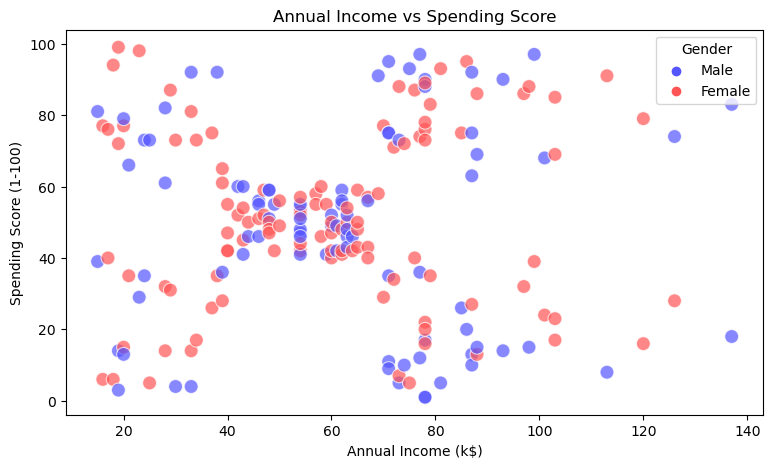

In [21]:
plt.figure(figsize=(9,5))
sns.scatterplot(data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',palette='seismic',s=100,alpha=0.7)
plt.title('Annual Income vs Spending Score')
plt.show()

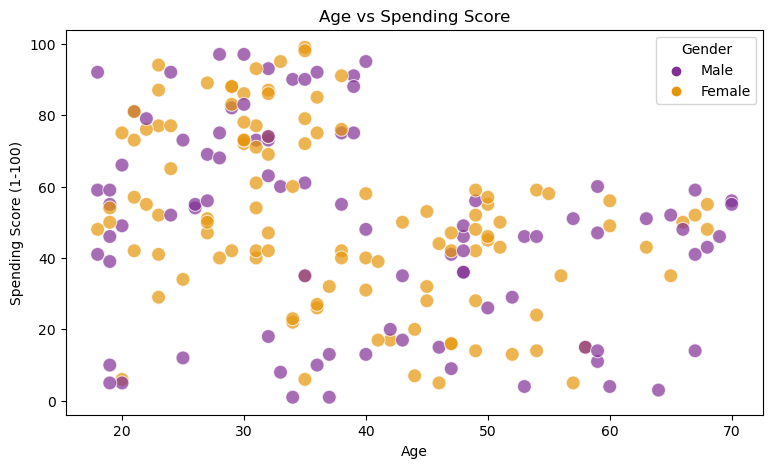

In [22]:
plt.figure(figsize=(9,5))
sns.scatterplot(data,x='Age',y='Spending Score (1-100)',hue='Gender',palette='CMRmap',s=100,alpha=0.7)

plt.title('Age vs Spending Score')
plt.show()

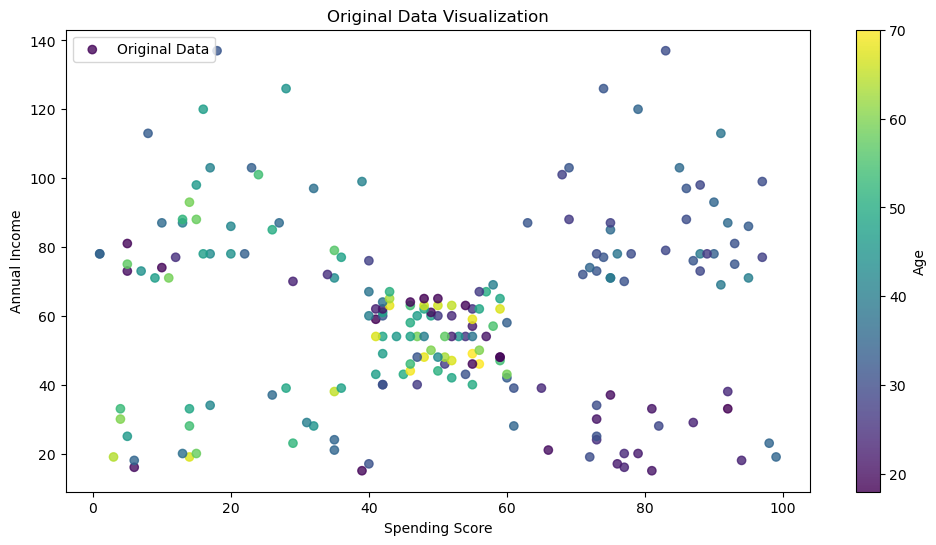

In [23]:
X1=data[['Age','Annual Income (k$)','Spending Score (1-100)']]

# Visualisasikan data points 
plt.figure(figsize=(12, 6))
plt.scatter(X1['Spending Score (1-100)'], X1['Annual Income (k$)'], c=X1['Age'], cmap='viridis', label='Original Data', alpha=0.8)
plt.title('Original Data Visualization')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend()
plt.colorbar(label='Age')  # Tambahkan colorbar untuk menunjukkan nilai Age
plt.show()

In [24]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_quantile = 0
best_score = -1

for quantile in quantiles:
    # Estimate bandwidth
    bandwidth = estimate_bandwidth(X1, quantile=quantile)
    
    # Perform Mean Shift clustering
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X1)
    labels = ms.labels_
    
    # Calculate Silhouette Score only if more than one cluster is produced
    if len(set(labels)) > 1:
        score = silhouette_score(X1, labels)
        
        # Update best quantile and score
        if score > best_score:
            best_quantile = quantile
            best_score = score

print(f'Best quantile: {best_quantile}')


Best quantile: 0.1


In [25]:
estimate_bandwidth(X1, quantile=0.1)

22.173844534734847

In [27]:
mean_shift = MeanShift(bandwidth=22.173844534734847)
mean_shift.fit(X1)

MeanShift(bandwidth=22.173844534734847)

In [28]:
yhat_ms = mean_shift.predict(X1)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift:", clusters_ms)

Clusters of Mean Shift: [0 1 2 3 4]


In [29]:
labels_ms =mean_shift.labels_ 
data['MS_Cluster']=labels_ms
centroids_ms = mean_shift.cluster_centers_

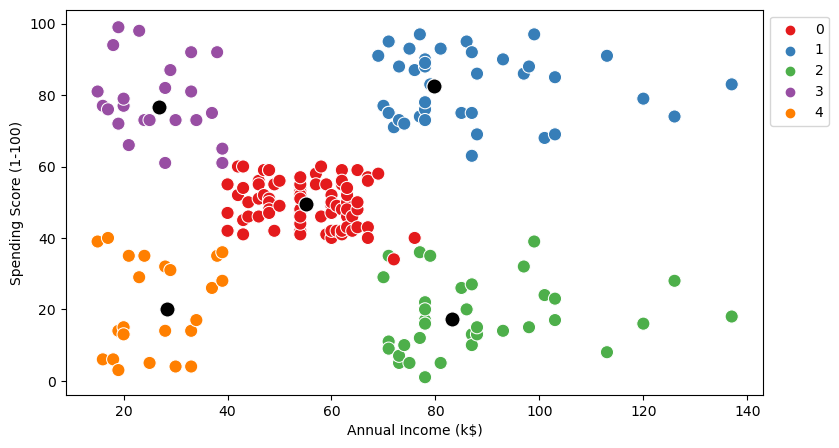

In [30]:
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=data,x='Annual Income (k$)', y='Spending Score (1-100)',hue='MS_Cluster',palette='Set1',s=90)
ax=sns.scatterplot(x=centroids_ms[:,1],y=centroids_ms[:,2],s=120,color='black')
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

**Evaluate Model**

In [32]:
silhouette_scores=[metrics.silhouette_score(X1,mean_shift.labels_)]

print(f"Silhouette Score on Test Data: {silhouette_scores}")

Silhouette Score on Test Data: [0.4432801841739952]


In [33]:
davies_bouldin_scores=[metrics.davies_bouldin_score(X1,mean_shift.labels_)]
print(f"Davies-Bouldin Score on Test Data: {davies_bouldin_scores}")

Davies-Bouldin Score on Test Data: [0.8243905801456572]
